| titanic
# Ensemble

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

In [70]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
def show_count_plot(feature):
    sns.countplot(data=df_train, x=feature, hue="Survived")
    plt.show()

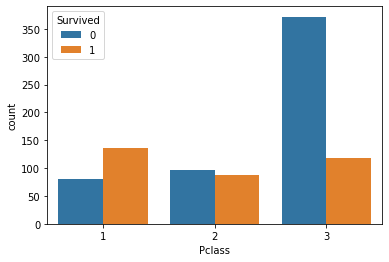

In [10]:
show_count_plot("Pclass")

In [24]:
def show_pie_plot(feature):
    df_survived = df_train.loc[df_train["Survived"]==1]
    sur_info = df_survived[feature].value_counts(sort=False)
    print(sur_info)
    plt.pie(sur_info, labels=sur_info.index, autopct="%0.1f%%")
    plt.show()

1    136
3    119
2     87
Name: Pclass, dtype: int64


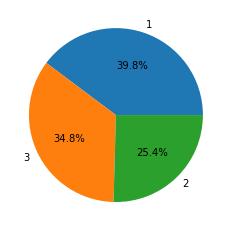

In [25]:
show_pie_plot("Pclass")  # 인덱스와 값이 나옴.

female    233
male      109
Name: Sex, dtype: int64


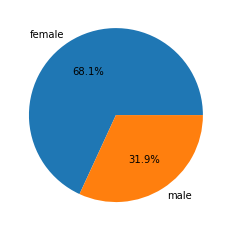

In [26]:
show_pie_plot("Sex") 

In [42]:
def show_group_rate(feature):
    # 그룹별 생존율 확인
    df_survived = df_train.loc[df_train["Survived"]==1]
    df_dead = df_train.loc[df_train["Survived"]==0]
    
    sur_info = df_survived[feature].value_counts(sort=False)
    dead_info = df_dead[feature].value_counts(sort=False) 
    
    print(sur_info)
    print()
    print(dead_info)
    
    for index in sur_info.index:
        plt.pie([sur_info[index], dead_info[index]],
               labels=["Survived", "Dead"],
               autopct="%0.1f%%")
        plt.title(f"Survival rate of {index}")
        plt.show()

1    136
3    119
2     87
Name: Pclass, dtype: int64

3    372
1     80
2     97
Name: Pclass, dtype: int64


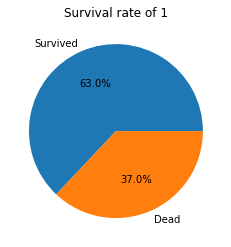

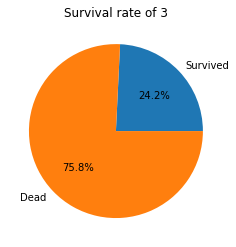

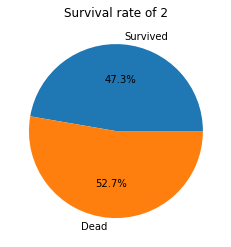

In [44]:
show_group_rate("Pclass")

# enumerate
- 원소 인덱스 가져오기

In [53]:
letters = ['A', 'B', 'C', 'D']
for i, l in enumerate(letters):
    print(i, l)

0 A
1 B
2 C
3 D


In [54]:
def show_group_rate2(feature):
    # 그룹별 생존율 확인
    df_survived = df_train.loc[df_train["Survived"]==1]
    df_dead = df_train.loc[df_train["Survived"]==0]
    
    sur_info = df_survived[feature].value_counts(sort=False)
    dead_info = df_dead[feature].value_counts(sort=False) 
    
    print(sur_info)
    print()
    print(dead_info)

    fig = plt.figure()
    plt.title(f"Survival Rate of {feature}")  # 그림의 전체 이름
    
    for i, index in enumerate(sur_info.index):
        fig.add_subplot(1, len(sur_info), i+1)  # 행 개수, 열 개수, 몇 번째에 그릴 것인지(1부터 시작) 입력
        plt.pie([sur_info[index], dead_info[index]],
               labels=["Survived", "Dead"],
               autopct="%0.1f%%")
        plt.title(f"Survival rate of {index}")
        
    plt.show()

female    233
male      109
Name: Sex, dtype: int64

male      468
female     81
Name: Sex, dtype: int64


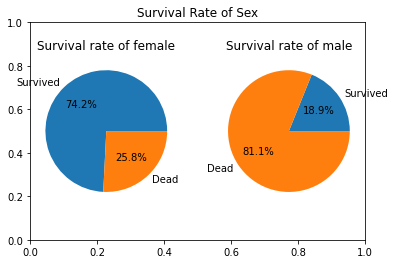

In [56]:
show_group_rate2("Sex")

## Age를 그룹별로 나누어 처리해보기
- 비어있는 값 채우기
- 나이별 그룹 만들기

# Preprocessing

In [71]:
# 무관한 column 날리기
df_train = df_train.drop(["PassengerId", "Name", "Ticket", "Fare", "Cabin"], axis=1)  # 세로 방향으로 컬럼을 날리기 위해 axis=1

In [72]:
# null 값 평균으로 채워주기
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean())

In [73]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [74]:
# Embarked null값 날리거나, 가장 많은 값으로 채우기
df_train["Embarked"] = df_train["Embarked"].fillna("S")

In [76]:
# 문제 데이터를 숫자로 바꾸기 (안바꿔주니까 에러 발생)
# 원래 원핫인코딩 해줘야 함. fair하게. [0 1] [1 0] 이런 식으로.
df_train["Sex"] = df_train["Sex"].map({"male":0, "female":1})
df_train["Embarked"] = df_train["Embarked"].map({"Q":0, "C":1, "S":2})

In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


# Train

In [86]:
clf = RandomForestClassifier(max_depth=5,
                            n_estimators=300)

In [87]:
y = df_train["Survived"]
x = df_train.drop("Survived", axis=1)

In [88]:
clf.fit(x, y)

RandomForestClassifier(max_depth=5, n_estimators=300)

In [89]:
clf.score(x, y)

0.8428731762065096

# Test

In [90]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [92]:
# 학습 데이터 전처리한 것과 똑같이 맞춰줘야 함
# 필요없는 column 날리고, age 평균으로 null 채워주기 등
passengerId = df_test['PassengerId']  # 정답 파일 만들때 이거랑 매치해서 답 넣어줘야 하기 때문에 drop하기 전에 미리 빼놓기
df_test = df_test.drop(["PassengerId", "Name", "Ticket", "Fare", "Cabin"], axis=1)  # 세로 방향으로 컬럼을 날리기 위해 axis=1
df_test["Age"] = df_test["Age"].fillna(df_train["Age"].mean())
df_test["Embarked"] = df_test["Embarked"].fillna("S")
df_test["Sex"] = df_test["Sex"].map({"male":0, "female":1})
df_test["Embarked"] = df_test["Embarked"].map({"Q":0, "C":1, "S":2})

In [93]:
# 분류기에 넣고 결과 보기
result = clf.predict(df_test)
result

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# 정답 파일과 비교해보기

In [97]:
gt = pd.read_csv("groundtruth.csv")

In [100]:
hit = 0
miss = 0

for i in range(len(result)):
    if result[i] == gt["Survived"][i]:
        hit += 1
    else:
        miss += 1

print(f'{hit}, {miss}, {hit/(hit+miss)}%')

328, 90, 0.784688995215311%


In [107]:
def myPredict(x):
    '''
    x : 한 사람의 정보, 한 행
    '''
    # if x["Sex"] == "male":
    if x["Sex"] == 0:
        return 0
    else:
        return 1

In [108]:
myPredict(df_test.loc[0]), myPredict(df_test.loc[1])

(0, 1)

# submit